# PRONOVO DATA ANALYSIS 

This notebook is dedicated to the investigation, cleaning and aggregation of the pronovo data to get data for each swiss municipality

In [1]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# load data 
datapath = "../../data/raw_data/GWR_PV_Daten.csv"
pronovo_df = pd.read_csv(datapath, low_memory=False)
pronovo_df

,EGID,GDEKT,GGDENR,GGDENAME,EGRID,LGBKR,LPARZ,LPARZSX,LTYP,GEBNR,...,PV_Pot_reco,Roof_area,Facade_area,FPV_Pot,FPV_Pot_reco,BeginningOfOperation,InitialPower,TotalPower,PlantCategory,TotalEnergy
0,11513432,ZH,1,Aeugst am Albis,CH540120777857,0.0,1573,NaN,NaN,1199,...,11040.259333,230.578943,317.346632,8237.377869,0.000000,NaN,NaN,NaN,NaN,NaN
1,11513433,ZH,1,Aeugst am Albis,CH587820017717,0.0,1543,NaN,NaN,1198,...,9525.977213,151.208898,228.503458,8979.194682,5247.683171,NaN,NaN,NaN,NaN,NaN
2,11517090,ZH,1,Aeugst am Albis,CH707701872012,0.0,1361,NaN,NaN,1017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1600000,ZH,1,Aeugst am Albis,CH487820017751,0.0,1631,NaN,NaN,164,...,19417.187289,266.831234,531.288763,22112.221833,15430.840027,NaN,NaN,NaN,NaN,NaN
4,1600001,ZH,1,Aeugst am Albis,CH567720017811,0.0,1579,NaN,NaN,154,...,22857.860524,459.940390,458.462737,15636.491774,4575.180087,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082584,980641,JU,6812,Basse-Vendline,CH194472980611,6775.0,277,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3082585,980642,JU,6812,Basse-Vendline,CH334470064703,6775.0,275,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3082586,980643,JU,6812,Basse-Vendline,CH610698447219,6775.0,272,NaN,NaN,NaN,...,9833.840534,154.674637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3082587,980644,JU,6812,Basse-Vendline,CH870674754404,6775.0,273,NaN,NaN,NaN,...,35591.242472,452.303969,986.727480,36240.531232,14821.824428,NaN,NaN,NaN,NaN,NaN


In [5]:
# Get a sense of the dataframe 
pronovo_df_test = pronovo_df.copy()

pronovo_df_test.replace(["NaN", "nan", " N/A", "Na"], np.nan, inplace=True)
#pronovo_df_test = pronovo_df_test.dropna(subset=["InitialPower"])
#empty_cols_df = pronovo_df_test.isnull().sum()
#empty_cols_df[empty_cols_df==0]
print(pronovo_df_test.shape, pronovo_df.shape)

# selects rows where InitialPower is nan 
df_test = pronovo_df_test[~pronovo_df_test["InitialPower"].isin([np.nan])].copy()

# counts NaN values
df_test["InitialPower"].isna().sum()

(3082589, 62) (3082589, 62)


0

In [6]:
# take a look at all the columns of the dataframe 
#pronovo_df.columns

In [7]:
# Analyses which column has most NaN values
pronovo_df.replace(["NaN", "nan", " N/A", "Na"], np.nan, inplace=True)
#for i, column in enumerate(pronovo_df.columns): 
    #print(f"{column}: {pronovo_df[column].isna().sum()}")

In [8]:
# Keeps only the columns of potential interest  
columns_to_keep = [
    "EGID", 
    "GDEKT", 
    "GGDENR", 
    "GGDENAME", 
    "GSTAT", 
    "GKAT",
    "GKLAS",
    "Coord_lat", 
    "Coord_long",
    "PV_Pot", 
    "PV_Pot_reco", 
    "Roof_area", 
    "Facade_area",
    "FPV_Pot", 
    "FPV_Pot_reco",
    "BeginningOfOperation",
    "InitialPower",
    "TotalPower",
    "PlantCategory",
    "TotalEnergy",
]
df = pronovo_df[columns_to_keep].copy()
df.shape

(3082589, 20)

In [9]:
# Agreggates 

Municipal_df = df.groupby(["GGDENR","GGDENAME","GDEKT"]).agg(
    pv_pot=('PV_Pot', 'sum'),  # Maximal potential PV production in each municipality
    pv_pot_reco=('PV_Pot_reco', 'sum'),  # Recommended potential PV production in each municipality
    fpv_Pot=('FPV_Pot', 'sum'),  # Maximal potential Facade PV production in each municipality
    fpv_pot_reco=('FPV_Pot_reco', 'sum'),  # Recommended potential Facade PV production in each municipality
    roof_area=('Roof_area', 'sum'),
    facade_area=('Facade_area', 'sum'),
    total_power=('TotalPower', 'sum'),
    total_energy=('TotalEnergy', 'sum'),
    initial_power=('InitialPower', 'sum')
).reset_index(["GGDENR","GGDENAME","GDEKT"])


# Rename columns to snake_case
Municipal_df.columns = Municipal_df.columns.str.lower().str.replace(' ', '_')

# Rename specific columns using a dictionary
#Municipal_df = Municipal_df.rename(columns={'ggdenr': 'mun_id', 'ggdename': 'mun_name', 'gdekt': 'canton_abr'}).set_index(['mun_id','mun_name'])
Municipal_df = Municipal_df.rename(columns={'ggdenr': 'mun_id', 'ggdename': 'mun_name', 'gdekt': 'canton_abr'}).set_index(['mun_name'])


In [10]:
#check for uniqueness of ID
#plt.plot(Municipal_df["GGDENR"].value_counts())
#plt.show()

#otherway to verify if the indices are unique
Municipal_df.index.is_unique

True

In [11]:
Municipal_df['total_potential'] = Municipal_df.pv_pot + Municipal_df.fpv_pot
Municipal_df['recommended_potential'] = Municipal_df.pv_pot_reco + Municipal_df.fpv_pot_reco
Municipal_df.loc[Municipal_df.index.str.contains("Mé")]

,mun_id,canton_abr,pv_pot,pv_pot_reco,fpv_pot,fpv_pot_reco,roof_area,facade_area,total_power,total_energy,initial_power,total_potential,recommended_potential
mun_name,,,,,,,,,,,,,
Ménières,2027,FR,4.200385e+06,3.497587e+06,2.037332e+06,1.515457e+06,34950.268554,37769.296920,351.00,351000.0,327.00,6.237717e+06,5.013044e+06
Mézières (FR),2087,FR,1.168835e+07,9.796243e+06,5.633944e+06,3.769803e+06,93036.096437,95776.343517,964.30,964300.0,949.57,1.732230e+07,1.356605e+07
Jouxtens-Mézery,5585,VD,1.184648e+07,9.146080e+06,5.163761e+06,3.368909e+06,101847.042080,102039.102405,1026.99,1026990.0,995.61,1.701024e+07,1.251499e+07
Jorat-Mézières,5806,VD,2.862727e+07,2.446421e+07,1.326458e+07,9.011712e+06,228663.215267,235260.639767,2873.31,2873310.0,2797.95,4.189184e+07,3.347592e+07


In [13]:
# tests

# Assert that the new column is calculated correctly for specific rows (e.g., first row)
assert Municipal_df['total_potential'].iloc[0] == Municipal_df['pv_pot'].iloc[0] + Municipal_df['fpv_pot'].iloc[0], "Incorrect calculation for total_pot in first row"
# Assert that the new column is calculated correctly for specific rows (e.g., first row)
assert Municipal_df['recommended_potential'].iloc[0] == Municipal_df['pv_pot_reco'].iloc[0] + Municipal_df['fpv_pot_reco'].iloc[0], "Incorrect calculation for total_pot_reco in first row"

In [14]:
Municipal_df["achieved_rp"]= Municipal_df.total_energy / Municipal_df.recommended_potential #achieved recommended potential
Municipal_df["achieved_tp"]= Municipal_df.total_energy / Municipal_df.total_potential #achieved total potential

In [15]:
# tests

# Assert that the new column is calculated correctly for specific rows (e.g., first row)
assert Municipal_df['achieved_rp'].iloc[0] == Municipal_df['total_energy'].iloc[0] / Municipal_df['recommended_potential'].iloc[0], "Incorrect calculation for total_pot in first row"
# Assert that the new column is calculated correctly for specific rows (e.g., first row)
assert Municipal_df['achieved_tp'].iloc[0] == Municipal_df['total_energy'].iloc[0] / Municipal_df['total_potential'].iloc[0], "Incorrect calculation for total_pot_reco in first row"

In [16]:
# Proportion of recommended potential w.r.t. full potential
Municipal_df['achieved_tp']/Municipal_df['achieved_rp']

mun_name
Aeugst am Albis       0.670631
Affoltern am Albis    0.712505
Bonstetten            0.678145
Hausen am Albis       0.680309
Hedingen              0.689615
                        ...   
Clos du Doubs         0.673181
Haute-Ajoie           0.729627
La Baroche            0.698079
Damphreux-Lugnez      0.700716
Basse-Vendline        0.724654
Length: 2133, dtype: float64

### Comment
The recommended potential seems to be roughly 2/3 of the maximum potential

In [18]:
# Sorts df to get the highest potential reached on top 
# Sort the DataFrame in-place (no need to assign to a new variable)

Municipal_df.sort_values(by='achieved_rp', ascending=False, inplace=True)
Municipal_df.head(10)

,mun_id,canton_abr,pv_pot,pv_pot_reco,fpv_pot,fpv_pot_reco,roof_area,facade_area,total_power,total_energy,initial_power,total_potential,recommended_potential,achieved_rp,achieved_tp
mun_name,,,,,,,,,,,,,,,
Sévaz,2043,FR,4.670673e+06,4.180890e+06,1.929158e+06,1.425327e+06,39036.054397,33832.332298,3693.98,3693980.0,3693.98,6.599830e+06,5.606217e+06,0.658908,0.559708
Onnens (VD),5565,VD,1.305776e+07,1.177943e+07,3.235058e+06,2.103798e+06,112876.590943,63996.552432,8615.12,8615120.0,8607.17,1.629282e+07,1.388323e+07,0.620542,0.528768
Cressier (NE),6452,NE,1.679586e+07,1.422929e+07,7.305761e+06,4.541674e+06,146427.208998,153540.786324,9229.40,9229400.0,8890.75,2.410162e+07,1.877096e+07,0.491685,0.382937
Clarmont,5629,VD,1.777467e+06,1.489369e+06,9.465443e+05,6.455402e+05,13871.650234,16173.060807,986.84,986840.0,859.72,2.724012e+06,2.134909e+06,0.462240,0.362275
Giornico,5073,TI,1.495146e+07,5.614214e+06,5.010771e+06,2.016368e+06,150042.723782,137640.972544,3393.20,3393200.0,3376.56,1.996223e+07,7.630582e+06,0.444684,0.169981
Rennaz,5412,VD,7.770571e+06,6.369299e+06,2.633448e+06,1.462546e+06,70071.277125,57068.953828,3085.15,3085150.0,3023.45,1.040402e+07,7.831844e+06,0.393924,0.296534
Evionnaz,6213,VS,9.653954e+06,7.682207e+06,4.042026e+06,1.797798e+06,93550.759706,97386.730964,3705.04,3705040.0,3248.94,1.369598e+07,9.480005e+06,0.390827,0.270520
Mellikon,4314,AG,2.454274e+06,1.726946e+06,1.247428e+06,6.393422e+05,25051.907086,29410.225605,909.32,909320.0,889.65,3.701702e+06,2.366288e+06,0.384281,0.245649
Chessel,5403,VD,3.477039e+06,2.727930e+06,1.587470e+06,9.289769e+05,30061.397101,34309.873855,1314.55,1314550.0,1297.72,5.064510e+06,3.656907e+06,0.359470,0.259561


# Importing public dataset on PV potential 

In [20]:
# loading open source data on PV potential 
public_df = pd.read_csv("../Statistical_data/Swiss_municipalities_solar_potential.csv").set_index(["MunicipalityName"])
print(public_df.shape)
#public_df.set_index("MunicipalityNumber", inplace=True)

(2147, 35)


In [21]:
# Indices in df1 but not in df2
missing_mun = list(public_df.index.difference(Municipal_df.index))
print(missing_mun)

new_mun = list(Municipal_df.index.difference(public_df.index))
print(new_mun)

['Balzers', 'Beurnevésin', 'Bonfol', 'Eschen', 'Gamprin', 'Lüterswil-Gächliwil', 'Mauren', 'Planken', 'Ruggell', 'Schaan', 'Schellenberg', 'Triesen', 'Triesenberg', 'Turgi', 'Vaduz', 'Wangenried', 'Zwieselberg']
['Basse-Vendline', "C'za Cadenazzo/Monteceneri", 'Staatswald Galm']


### Comment 
The aforementionned Municipalities have fusionned with others at the the beginning of 2024 or are located in Liechstestein and won't be considered in the present work.

In [23]:
Municipal_df[Municipal_df.index=="Basse-Vendline"]

,mun_id,canton_abr,pv_pot,pv_pot_reco,fpv_pot,fpv_pot_reco,roof_area,facade_area,total_power,total_energy,initial_power,total_potential,recommended_potential,achieved_rp,achieved_tp
mun_name,,,,,,,,,,,,,,,
Basse-Vendline,6812,JU,1.397817e+07,1.062260e+07,6.249792e+06,4.035668e+06,124946.956665,125424.946745,1577.25,1577250.0,1461.46,2.022796e+07,1.465826e+07,0.107601,0.077974


In [24]:
# Enable warnings for silent downcasting in future operations
pd.set_option('future.no_silent_downcasting', True)

# Function to merge municipalities in a DataFrame with updated handling for FutureWarning
def merge_municipalities(df, source, target, target_mun_num=None):
    """
    Merges numeric and non-numeric data from 'source' row into 'target' row in a DataFrame.
    Optionally updates the 'MunicipalityNumber' for the target.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing municipal data.
    source (str): The municipality being merged into the target.
    target (str): The municipality to retain, where merged data will be saved.
    target_mun_num (int, optional): New MunicipalityNumber to assign to the target.
    
    Returns:
    pd.DataFrame: Updated DataFrame with the source municipality dropped.
    """

    # Identify numeric and non-numeric columns
    numeric_columns = list(df.select_dtypes(include='number').columns)
    municipality_ind = numeric_columns.pop(numeric_columns.index("MunicipalityNumber"))
    non_numeric_columns = list(df.select_dtypes(exclude='number').columns)
    non_numeric_columns.append(municipality_ind)
    
    # Sum numeric columns for source and target rows with explicit type inference to avoid warnings
    numeric_sum = (
        df.loc[target, numeric_columns].fillna(0).infer_objects(copy=False)
        + df.loc[source, numeric_columns].fillna(0).infer_objects(copy=False)
    )
    
    # Retain non-numeric data from the target municipality
    non_numeric = df.loc[target, non_numeric_columns]
    
    # Combine numeric and non-numeric data into a single row
    merged_row = pd.concat([numeric_sum, non_numeric])
    
    # Convert merged_row to DataFrame for proper alignment and update the target row
    merged_df = pd.DataFrame([merged_row], index=[target], columns=df.columns)
    df.update(merged_df)
    
    # Update 'MunicipalityNumber' if specified
    if target_mun_num:
        df.loc[target, 'MunicipalityNumber'] = target_mun_num

    # Drop the source municipality row
    #print(type(df))
    print(source)
    df.drop(source, axis=0, inplace=True)
    return df

In [25]:
# Preparing fusion-related lists and dictionaries
lieschtenstein_mun = ['Balzers', 'Eschen', 'Gamprin', 'Mauren', 'Planken', 'Ruggell', 'Schaan', 'Schellenberg', 'Triesen', 'Triesenberg', 'Vaduz']
fusion_dict = {'Lüterswil-Gächliwil': 'Buchegg', 'Zwieselberg': 'Reutigen', 'Turgi': 'Baden', 'Wangenried': 'Wangen an der Aare'}
merge = ['Beurnevésin', 'Bonfol']

# Making copies to work with
public_df_2024 = public_df.copy()

# Main loop for processing each missing municipality
for ind in missing_mun:
    # Case 1: Municipality in Liechtenstein - drop directly
    if ind in lieschtenstein_mun:
        #public_df_2024 = public_df_2024.drop(ind, axis=1)
        #Pop_mun_df_2024 = Pop_mun_df_2024.drop(ind, axis=1)
        continue
    # Case 2: Municipality needs fusion with a target municipality from fusion_dict
    elif ind in fusion_dict.keys():
        # Merge data in public_df_2024
        print(ind)
        public_df_2024 = merge_municipalities(public_df_2024, ind, fusion_dict[ind])
        # Merge data in Pop_mun_df_2024
        #Pop_mun_df_2024 = merge_municipalities(Pop_mun_df_2024, ind, fusion_dict[ind])

public_df_2024.drop(lieschtenstein_mun, axis=0, inplace=True) # public_df contains 
#Pop_mun_df_2024.drop(lieschtenstein_mun, axis=0, inplace=True)

# Merge specific municipalities in both public_df_2024 and Pop_mun_df_2024 to create 'Basse-Vendline'
target_name = 'Basse-Vendline'
target_mun_num = 6812  # Desired MunicipalityNumber for Basse-Vendline

# Public data merging
public_df_2024 = merge_municipalities(public_df_2024, merge[1], merge[0], target_mun_num)
public_df_2024.loc[target_name] = public_df_2024.loc[merge[0]]
public_df_2024 = public_df_2024.drop(merge[0], axis=0)

# Population data merging
#Pop_mun_df_2024 = merge_municipalities(Pop_mun_df_2024, merge[1], merge[0], target_mun_num)
#Pop_mun_df_2024.loc[target_name] = Pop_mun_df_2024.loc[merge[0]]
#Pop_mun_df_2024 = Pop_mun_df_2024.drop(merge[0], axis=0)

# Display result for verification
#public_df_2024[public_df_2024.index == target_name]
public_df_2024.reset_index("MunicipalityName", inplace=True)
public_df_2024.set_index("MunicipalityNumber", inplace=True)
#public_df_2024.head()

#Pop_mun_df_2024.reset_index("MunicipalityName", inplace=True)
#Pop_mun_df_2024.set_index("MunicipalityNumber", inplace=True)
#Pop_mun_df_2024.head()


#
#Municipal_df[Municipal_df.index=="Basse-Vendline"]

Lüterswil-Gächliwil
Lüterswil-Gächliwil
Turgi
Turgi
Wangenried
Wangenried
Zwieselberg
Zwieselberg
Bonfol


In [26]:
# setting municipality number as index in Municipal df  
Municipal_df_numerind = Municipal_df.copy()
Municipal_df_numerind.reset_index("mun_name", inplace=True)
Municipal_df_numerind.set_index("mun_id", inplace=True)
Municipal_df_numerind.head()
#new_mun = list(Municipal_df.index.difference(public_df_2024.index))
#Municipal_df[Municipal_df.index==767]

,mun_name,canton_abr,pv_pot,pv_pot_reco,fpv_pot,fpv_pot_reco,roof_area,facade_area,total_power,total_energy,initial_power,total_potential,recommended_potential,achieved_rp,achieved_tp
mun_id,,,,,,,,,,,,,,,
2043,Sévaz,FR,4.670673e+06,4.180890e+06,1.929158e+06,1.425327e+06,39036.054397,33832.332298,3693.98,3693980.0,3693.98,6.599830e+06,5.606217e+06,0.658908,0.559708
5565,Onnens (VD),VD,1.305776e+07,1.177943e+07,3.235058e+06,2.103798e+06,112876.590943,63996.552432,8615.12,8615120.0,8607.17,1.629282e+07,1.388323e+07,0.620542,0.528768
6452,Cressier (NE),NE,1.679586e+07,1.422929e+07,7.305761e+06,4.541674e+06,146427.208998,153540.786324,9229.40,9229400.0,8890.75,2.410162e+07,1.877096e+07,0.491685,0.382937
5629,Clarmont,VD,1.777467e+06,1.489369e+06,9.465443e+05,6.455402e+05,13871.650234,16173.060807,986.84,986840.0,859.72,2.724012e+06,2.134909e+06,0.462240,0.362275
5073,Giornico,TI,1.495146e+07,5.614214e+06,5.010771e+06,2.016368e+06,150042.723782,137640.972544,3393.20,3393200.0,3376.56,1.996223e+07,7.630582e+06,0.444684,0.169981


In [27]:
# VERIFYING THAT WE HAVE THE SAME INDICES AND MUNICIPALITIES Indices in df1 but not in df2

#elements that are in the public_df and not in the Municipal df
missing_mun = list(public_df_2024.index.difference(Municipal_df_numerind.index))
print("elements that are in the public_df and not in the Municipal df: ", missing_mun)

# elements in Municipal_df that aren't in the public df 2024
Addtional_mun = list(Municipal_df_numerind.index.difference(public_df_2024.index))
print("elements in Municipal_df that aren't in the public df 2024:", Addtional_mun)

# making sure we are left with only the pieces of territory that aren't municipalities per sei
Municipal_df_numerind[Municipal_df_numerind.index==2391]
Municipal_df_numerind[Municipal_df_numerind.index==5391]

elements that are in the public_df and not in the Municipal df:  []
elements in Municipal_df that aren't in the public df 2024: [2391, 5391]


,mun_name,canton_abr,pv_pot,pv_pot_reco,fpv_pot,fpv_pot_reco,roof_area,facade_area,total_power,total_energy,initial_power,total_potential,recommended_potential,achieved_rp,achieved_tp
mun_id,,,,,,,,,,,,,,,
5391,C'za Cadenazzo/Monteceneri,TI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [28]:
## inner join as we want to keep only the rows that have information about them 
#Municipal_df=Municipal_df.reset_index()
#Pop_mun_df_2024=Pop_mun_df_2024.reset_index()
# Merge df1 and df2 on df1['column_A'] and df2['column_B']
Swiss_solar_potential_df = pd.merge(Municipal_df_numerind, public_df_2024, left_index=True, right_index=True, how='inner')
Swiss_solar_potential_df.drop(["MunicipalityName"], axis=1, inplace=True)
Swiss_solar_potential_df["mun_id"] = Swiss_solar_potential_df.index
print(Swiss_solar_potential_df.columns)
Swiss_solar_potential_df.head()

Index(['mun_name', 'canton_abr', 'pv_pot', 'pv_pot_reco', 'fpv_pot',
       'fpv_pot_reco', 'roof_area', 'facade_area', 'total_power',
       'total_energy', 'initial_power', 'total_potential',
       'recommended_potential', 'achieved_rp', 'achieved_tp', 'Canton',
       'Country', 'Scenario1_RoofsOnly_PotentialSolarElectricity_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month01_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month02_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month03_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month04_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month05_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month06_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month07_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month08_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month09_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectrici

,mun_name,canton_abr,pv_pot,pv_pot_reco,fpv_pot,fpv_pot_reco,roof_area,facade_area,total_power,total_energy,...,Scenario3_RoofsFacades_PotentialSolarElectricity_Month08_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month09_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month10_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month11_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month12_GWh,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology,mun_id
2043,Sévaz,FR,4.670673e+06,4.180890e+06,1.929158e+06,1.425327e+06,39036.054397,33832.332298,3693.98,3693980.0,...,1.72,1.35,0.87,0.50,0.35,13.55,0.86,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2043
5565,Onnens (VD),VD,1.305776e+07,1.177943e+07,3.235058e+06,2.103798e+06,112876.590943,63996.552432,8615.12,8615120.0,...,2.12,1.67,1.02,0.57,0.42,15.85,1.54,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,5565
6452,Cressier (NE),NE,1.679586e+07,1.422929e+07,7.305761e+06,4.541674e+06,146427.208998,153540.786324,9229.40,9229400.0,...,3.73,2.97,1.86,1.04,0.79,26.41,4.48,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6452
5629,Clarmont,VD,1.777467e+06,1.489369e+06,9.465443e+05,6.455402e+05,13871.650234,16173.060807,986.84,986840.0,...,0.38,0.32,0.21,0.12,0.10,2.79,0.46,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,5629
5073,Giornico,TI,1.495146e+07,5.614214e+06,5.010771e+06,2.016368e+06,150042.723782,137640.972544,3393.20,3393200.0,...,1.21,0.99,0.66,0.36,0.28,8.37,1.72,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,5073


In [29]:
# Save DataFrame to CSV
Swiss_solar_potential_df.reset_index
#Swiss_solar_potential_df.to_csv("../Swiss_solar_potential.csv", index=False)

<bound method DataFrame.reset_index of            mun_name canton_abr        pv_pot   pv_pot_reco       fpv_pot  \
2043          Sévaz         FR  4.670673e+06  4.180890e+06  1.929158e+06   
5565    Onnens (VD)         VD  1.305776e+07  1.177943e+07  3.235058e+06   
6452  Cressier (NE)         NE  1.679586e+07  1.422929e+07  7.305761e+06   
5629       Clarmont         VD  1.777467e+06  1.489369e+06  9.465443e+05   
5073       Giornico         TI  1.495146e+07  5.614214e+06  5.010771e+06   
...             ...        ...           ...           ...           ...   
6282         Eisten         VS  1.159662e+06  6.201025e+05  7.894920e+05   
6011   Zwischbergen         VS  9.111890e+05  1.736294e+05  6.840052e+05   
3713        Ferrera         GR  1.881119e+06  1.338627e+06  1.155161e+06   
3711      Rongellen         GR  6.321874e+05  2.848915e+05  2.847475e+05   
5304    Bosco/Gurin         TI  1.573302e+06  1.088195e+06  1.040593e+06   

      fpv_pot_reco      roof_area    facade_area

In [30]:
Swiss_solar_potential_df.set_index("mun_name", inplace=True)

In [31]:
Swiss_solar_potential_df

,canton_abr,pv_pot,pv_pot_reco,fpv_pot,fpv_pot_reco,roof_area,facade_area,total_power,total_energy,initial_power,...,Scenario3_RoofsFacades_PotentialSolarElectricity_Month08_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month09_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month10_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month11_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month12_GWh,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology,mun_id
mun_name,,,,,,,,,,,,,,,,,,,,,
Sévaz,FR,4.670673e+06,4.180890e+06,1.929158e+06,1.425327e+06,39036.054397,33832.332298,3693.98,3693980.0,3693.98,...,1.72,1.35,0.87,0.50,0.35,13.55,0.86,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2043
Onnens (VD),VD,1.305776e+07,1.177943e+07,3.235058e+06,2.103798e+06,112876.590943,63996.552432,8615.12,8615120.0,8607.17,...,2.12,1.67,1.02,0.57,0.42,15.85,1.54,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,5565
Cressier (NE),NE,1.679586e+07,1.422929e+07,7.305761e+06,4.541674e+06,146427.208998,153540.786324,9229.40,9229400.0,8890.75,...,3.73,2.97,1.86,1.04,0.79,26.41,4.48,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6452
Clarmont,VD,1.777467e+06,1.489369e+06,9.465443e+05,6.455402e+05,13871.650234,16173.060807,986.84,986840.0,859.72,...,0.38,0.32,0.21,0.12,0.10,2.79,0.46,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,5629
Giornico,TI,1.495146e+07,5.614214e+06,5.010771e+06,2.016368e+06,150042.723782,137640.972544,3393.20,3393200.0,3376.56,...,1.21,0.99,0.66,0.36,0.28,8.37,1.72,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,5073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Eisten,VS,1.159662e+06,6.201025e+05,7.894920e+05,3.089211e+05,12376.176170,18211.712716,0.00,0.0,0.00,...,0.28,0.24,0.18,0.10,0.08,2.15,0.40,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6282
Zwischbergen,VS,9.111890e+05,1.736294e+05,6.840052e+05,1.835165e+05,11167.439085,18390.274529,0.00,0.0,0.00,...,0.20,0.17,0.11,0.07,0.06,1.73,0.12,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6011
Ferrera,GR,1.881119e+06,1.338627e+06,1.155161e+06,6.540965e+05,18165.699377,24885.535927,0.00,0.0,0.00,...,0.39,0.33,0.23,0.14,0.11,2.82,0.77,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,3713


### SUGGESTIONS FROM SIMON deep embeded clustering
- doesn't rely on distances
- distance matrix including all covariance
- 1 distance matrix and plot the distance of the covariates between the different typologies..

In [33]:
#importing 9 urbanisation typologies 
urbanization_typo_df = pd.read_excel('../Statistical_data/Municipalities_typologies_9.xlsx', skiprows=4, skipfooter=11)
urbanization_typo_df.columns = ["MunicipalityNumber", "MunicipalityName", "urban_typo"]
urbanization_typo_df.set_index("MunicipalityName", inplace=True)

#print(urbanization_typo_df["urban_typo"].head(10))
french_cat = [
    'Commune périurbaine de faible densité (23)',
    'Commune urbaine d’une grande agglomération (11)',
    'Commune périurbaine de moyenne densité (22)',
    'Commune périurbaine de forte densité (21)',
    "Commune urbaine d'une agglomération moyenne (12)",
    'Commune urbaine d’une petite ou hors agglomération (13)',
    'Commune rurale en situation centrale (32)',
    'Commune d’un centre rural (31)',
    'Commune rurale périphérique (33)'
]
english_cat = [
    'Low-density peri-urban municipality (23)',
    'Urban municipality in a large agglomeration (11)',
    'Medium-density peri-urban municipality (22)',
    'High-density peri-urban municipality (21)',
    'Urban municipality in a medium-sized agglomeration (12)',
    'Urban municipality in a small or non-agglomerated area (13)',
    'Centrally located rural municipality (32)',
    'Rural center municipality (31)',
    'Peripheral rural municipality (33)'
]

for i, name in enumerate(english_cat):
    urbanization_typo_df["urban_typo"] = urbanization_typo_df["urban_typo"].replace(french_cat[i], name)
    
urbanization_typo_df = urbanization_typo_df.replace('X', 0)

# visualizes df
urbanization_typo_df.tail(10)

,MunicipalityNumber,urban_typo
MunicipalityName,,
Fontenais,6790,Urban municipality in a small or non-agglomera...
Grandfontaine,6792,Peripheral rural municipality (33)
Porrentruy,6800,Urban municipality in a small or non-agglomera...
Vendlincourt,6806,Peripheral rural municipality (33)
Basse-Allaine,6807,Peripheral rural municipality (33)
Clos du Doubs,6808,Peripheral rural municipality (33)
Haute-Ajoie,6809,Peripheral rural municipality (33)
La Baroche,6810,Peripheral rural municipality (33)
Damphreux-Lugnez,6811,Peripheral rural municipality (33)


In [34]:
df = pd.merge(Swiss_solar_potential_df, urbanization_typo_df, left_index=True, right_index=True, how='left')

In [35]:
df = df.drop("MunicipalityNumber", axis=1)

In [36]:
df.columns

Index(['canton_abr', 'pv_pot', 'pv_pot_reco', 'fpv_pot', 'fpv_pot_reco',
       'roof_area', 'facade_area', 'total_power', 'total_energy',
       'initial_power', 'total_potential', 'recommended_potential',
       'achieved_rp', 'achieved_tp', 'Canton', 'Country',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month01_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month02_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month03_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month04_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month05_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month06_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month07_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month08_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month09_GWh',
       'Scenario1_RoofsOnly_PotentialSolarElectricity_Month10_G

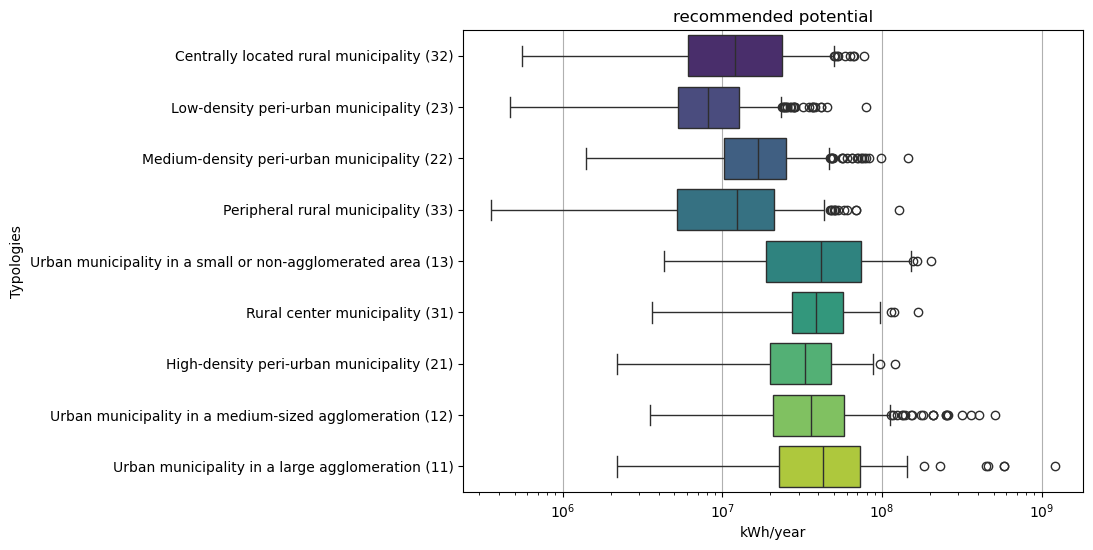

In [85]:
# Plot recommended potential achieved per typology
df1 = df.copy()
df1["achieved_rp"]*=100

plt.figure(figsize=(8, 6))

# Create the barplot with different colors per category
sns.boxplot(y='urban_typo', x='recommended_potential', data=df1, palette="viridis", hue='urban_typo')

# Add error bars manually
#plt.errorbar(y=grouped_df['urban_typo'], x=grouped_df['mean'], xerr=grouped_df['se'], fmt='none', capsize=5, color='red', label="standard error")

# Add labels and title
plt.title('recommended potential')
plt.xlabel('kWh/year')
plt.ylabel('Typologies')

# Set y-axis to log scale
#plt.yscale('log')

# Set x-axis to log scale (optional, if you want both axes in log scale)
plt.xscale('log')

# show grid on x a-axis only
plt.grid(axis="x")

# Show the plot
plt.show()

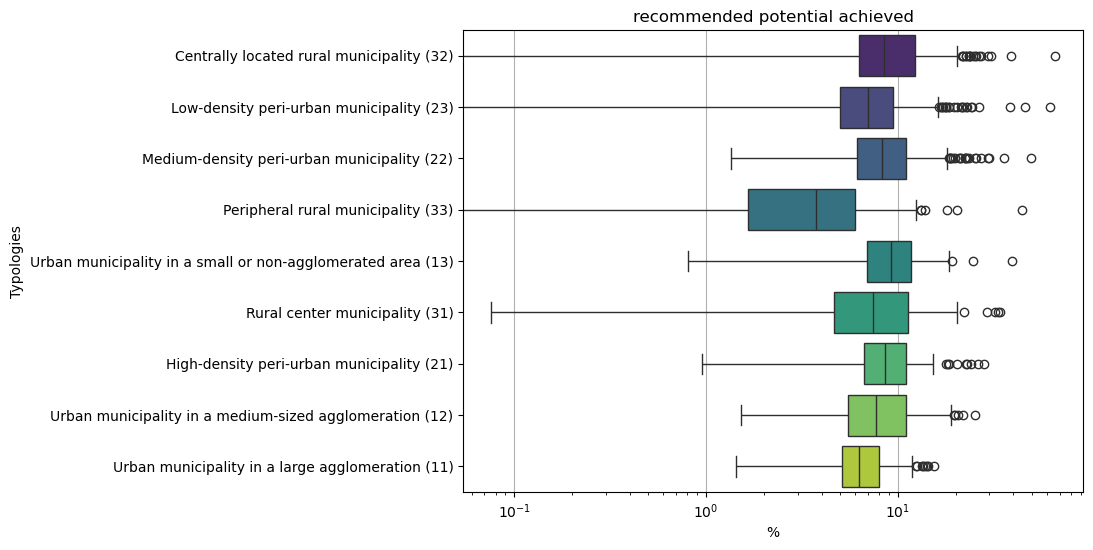

In [168]:
# Plot recommended potential achieved per typology
df1 = df.copy()
df1["achieved_rp"]*=100

plt.figure(figsize=(8, 6))

# Create the barplot with different colors per category
sns.boxplot(y='urban_typo', x='achieved_rp', data=df1, palette="viridis", hue='urban_typo')

# Add error bars manually
#plt.errorbar(y=grouped_df['urban_typo'], x=grouped_df['mean'], xerr=grouped_df['se'], fmt='none', capsize=5, color='red', label="standard error")

# Add labels and title
plt.title('recommended potential achieved')
plt.xlabel('%')
plt.ylabel('Typologies')

# Set y-axis to log scale
#plt.yscale('log')

# Set x-axis to log scale (optional, if you want both axes in log scale)
plt.xscale('log')

# show grid on x a-axis only
plt.grid(axis="x")

# Show the plot
plt.show()

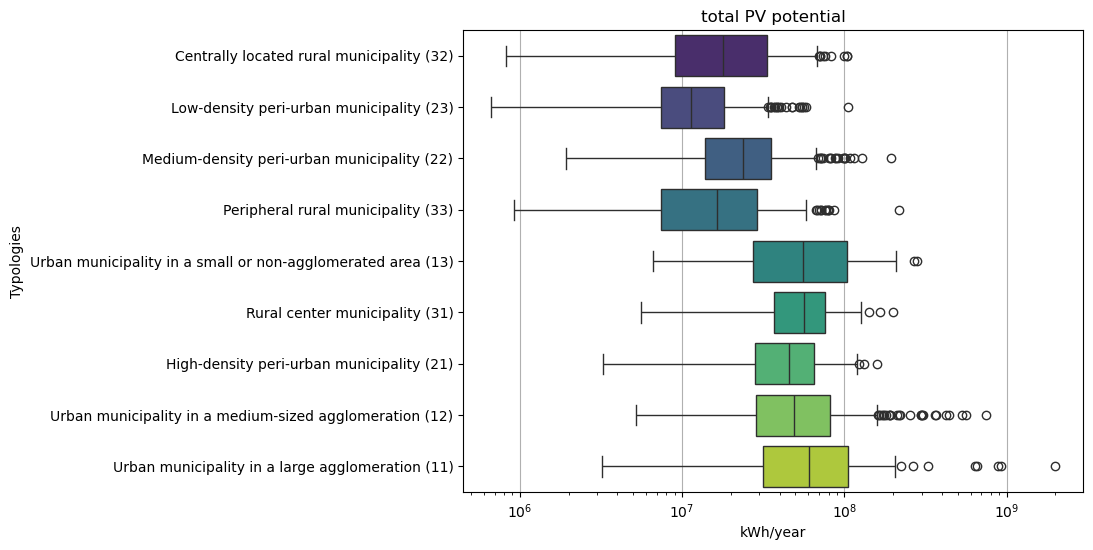

In [93]:
# Plot achieved potential per typology
plt.figure(figsize=(8, 6))

# Create the barplot with different colors per category
sns.boxplot(y='urban_typo', x='total_potential', data=df, palette="viridis", hue='urban_typo')

# Add error bars manually
#plt.errorbar(y=grouped_df['urban_typo'], x=grouped_df['mean'], xerr=grouped_df['se'], fmt='none', capsize=5, color='red', label="standard error")

# Add labels and title
plt.title('total PV potential')
plt.xlabel('kWh/year')
plt.ylabel('Typologies')

# Set y-axis to log scale
#plt.yscale('log')

# Set x-axis to log scale (optional, if you want both axes in log scale)
plt.xscale('log')

# show grid on x a-axis only
plt.grid(axis="x")

# Show the plot
plt.show()

                                    urban_typo total_potential                \
                                                          mean           std   
0    Centrally located rural municipality (32)    2.320253e+07  1.876087e+07   
1    High-density peri-urban municipality (21)    4.924752e+07  2.922610e+07   
2     Low-density peri-urban municipality (23)    1.422159e+07  1.076944e+07   
3  Medium-density peri-urban municipality (22)    2.841750e+07  2.189261e+07   
4           Peripheral rural municipality (33)    2.211927e+07  2.260850e+07   

                recommended_potential                              \
            sum                  mean           std           sum   
0  9.072190e+09          1.628623e+07  1.334630e+07  6.367916e+09   
1  6.057445e+09          3.585183e+07  2.143936e+07  4.409775e+09   
2  6.157950e+09          1.008108e+07  7.841993e+06  4.365107e+09   
3  1.062814e+10          2.038546e+07  1.609346e+07  7.624162e+09   
4  4.667166e+09          

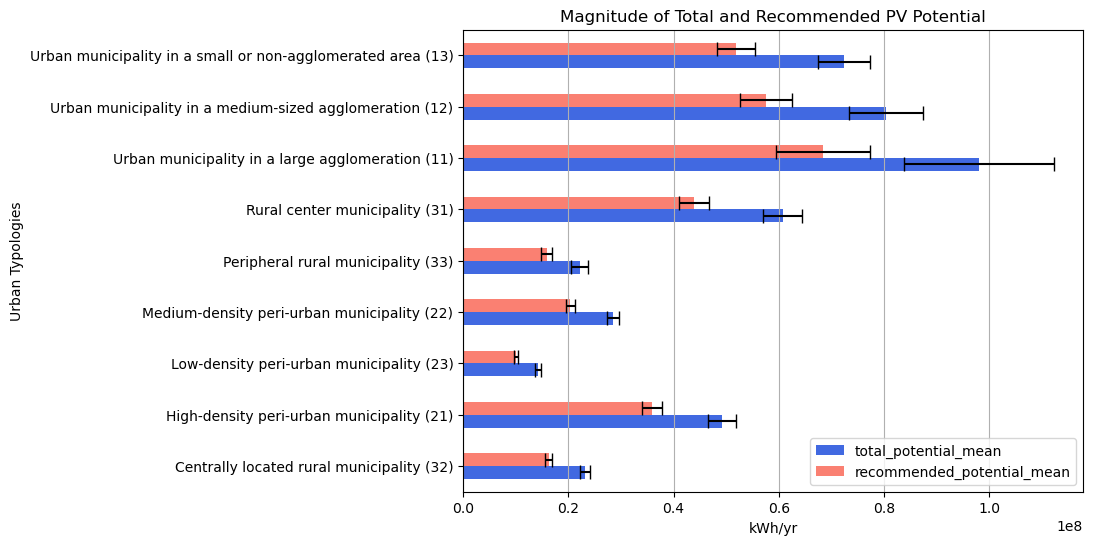

In [172]:
import numpy as np
import matplotlib.pyplot as plt

# Group by 'urban_typo' and calculate mean and standard deviation for both 'total_potential' and 'recommended_potential'
df1 = df.groupby("urban_typo")[['total_potential', 'recommended_potential']].agg(['mean', 'std', 'sum'])

# Calculate standard error by dividing the standard deviation by the square root of the sample size (n)
df1['total_potential', 'se'] = df1['total_potential', 'std'] / np.sqrt(df.groupby('urban_typo').size())
df1['recommended_potential', 'se'] = df1['recommended_potential', 'std'] / np.sqrt(df.groupby('urban_typo').size())

# Reset the index for easier plotting
df2 = df1.reset_index()

# Flatten the columns
df1.columns = ['_'.join(col) for col in df1.columns]

# Print first few rows of df2 for verification
print(df2.head())

# Set up the figure for plotting
plt.figure(figsize=(8, 6))

# Create the horizontal barplot with error bars (using the standard error values)
df1[['total_potential_mean', 'recommended_potential_mean']].plot(
    kind="barh",  # Horizontal barplot
    xerr=df1[['total_potential_se', 'recommended_potential_se']].values.T,  # xerr instead of yerr for horizontal bars
    capsize=5,
    ax=plt.gca(),
    color=['royalblue', 'salmon'],
    label=["Total Potential", "Recommended Potential"]
)

# Add labels and title
plt.title('Magnitude of Total and Recommended PV Potential')
plt.ylabel('Urban Typologies')  # y-axis now represents urban typologies
plt.xlabel('kWh/yr')  # x-axis now represents potential

plt.grid(axis="x")

# Show the plot
plt.show()


In [184]:
df1.sum()

total_potential_mean          4.485277e+08
total_potential_std           4.827800e+08
total_potential_sum           8.496008e+10
recommended_potential_mean    3.201945e+08
recommended_potential_std     3.307420e+08
recommended_potential_sum     6.050609e+10
total_potential_se            3.668153e+07
recommended_potential_se      2.520366e+07
dtype: float64

In [194]:
PV_pot_tot = (8.496008*10**10)/(10**6) #GWh
PV_pot_reco = (6.050609*10**10)/(10**6) #GWh
cons_CH_2023 = 66679 #GWh

PV_pot_share = PV_pot_tot/cons_CH_2023
print(PV_pot_share)

PV_reco_share = PV_pot_reco/cons_CH_2023
print(PV_reco_share)

1.2741654793863135
0.9074234766568184


In [41]:
df1 = df.groupby("urban_typo")[['total_potential', 'recommended_potential']].agg(['mean', 'std'])
df1

total_potential  \
                                                              mean   
urban_typo                                                           
Centrally located rural municipality (32)             2.320253e+07   
High-density peri-urban municipality (21)             4.924752e+07   
Low-density peri-urban municipality (23)              1.422159e+07   
Medium-density peri-urban municipality (22)           2.841750e+07   
Peripheral rural municipality (33)                    2.211927e+07   
Rural center municipality (31)                        6.068932e+07   
Urban municipality in a large agglomeration (11)      9.800462e+07   
Urban municipality in a medium-sized agglomerat...    8.028793e+07   
Urban municipality in a small or non-agglomerat...    7.233746e+07   

                                                                  \
                                                             std   
urban_typo                                                         
Centrally located rural municipality (32)           1.876087e+07   
High-density peri-urban municipality (21)           2.922610e+07   
Low-density peri-urban municipality (23)            1.076944e+07   
Medium-density peri-urban municipality (22)         2.189261e+07   
Peripheral rural municipality (33)                  2.260850e+07   
Rural center municipality (31)                      3.489624e+07   
Urban municipality in a large agglomeration (11)    1.872105e+08   
Urban municipality in a medium-sized agglomerat...  9.989684e+07   
Urban municipality in a small or non-agglomerat...  5.751897e+07   

                                                   recommended_potential  \
                                                                    mean   
urban_typo                                                                 
Centrally located rural municipality (32)                   1.628623e+07   
High-density peri-urban municipality (21)                   3.585183e+07   
Low-density peri-urban municipality (23)                    1.008108e+07   
Medium-density peri-urban municipality (22)                 2.038546e+07   
Peripheral rural municipality (33)                          1.587807e+07   
Rural center municipality (31)                              4.390411e+07   
Urban municipality in a large agglomeration (11)            6.834469e+07   
Urban municipality in a medium-sized agglomerat...          5.754944e+07   
Urban municipality in a small or non-agglomerat...          5.191361e+07   

                                                                  
                                                             std  
urban_typo                                                        
Centrally located rural municipality (32)           1.334630e+07  
High-density peri-urban municipality (21)           2.143936e+07  
Low-density peri-urban municipality (23)            7.841993e+06  
Medium-density peri-urban municipality (22)         1.609346e+07  
Peripheral rural municipality (33)                  1.552649e+07  
Rural center municipality (31)                      2.669549e+07  
Urban municipality in a large agglomeration (11)    1.184663e+08  
Urban municipality in a medium-sized agglomerat...  6.946003e+07  
Urban municipality in a small or non-agglomerat...  4.187259e+07

In [42]:
df1.head()

total_potential                \
                                                       mean           std   
urban_typo                                                                  
Centrally located rural municipality (32)      2.320253e+07  1.876087e+07   
High-density peri-urban municipality (21)      4.924752e+07  2.922610e+07   
Low-density peri-urban municipality (23)       1.422159e+07  1.076944e+07   
Medium-density peri-urban municipality (22)    2.841750e+07  2.189261e+07   
Peripheral rural municipality (33)             2.211927e+07  2.260850e+07   

                                            recommended_potential  \
                                                             mean   
urban_typo                                                          
Centrally located rural municipality (32)            1.628623e+07   
High-density peri-urban municipality (21)            3.585183e+07   
Low-density peri-urban municipality (23)             1.008108e+07   
Medium-density peri-urban municipality (22)          2.038546e+07   
Peripheral rural municipality (33)                   1.587807e+07   

                                                           
                                                      std  
urban_typo                                                 
Centrally located rural municipality (32)    1.334630e+07  
High-density peri-urban municipality (21)    2.143936e+07  
Low-density peri-urban municipality (23)     7.841993e+06  
Medium-density peri-urban municipality (22)  1.609346e+07  
Peripheral rural municipality (33)           1.552649e+07

In [158]:
df3 = df.groupby("urban_typo")["mun_id"].count()

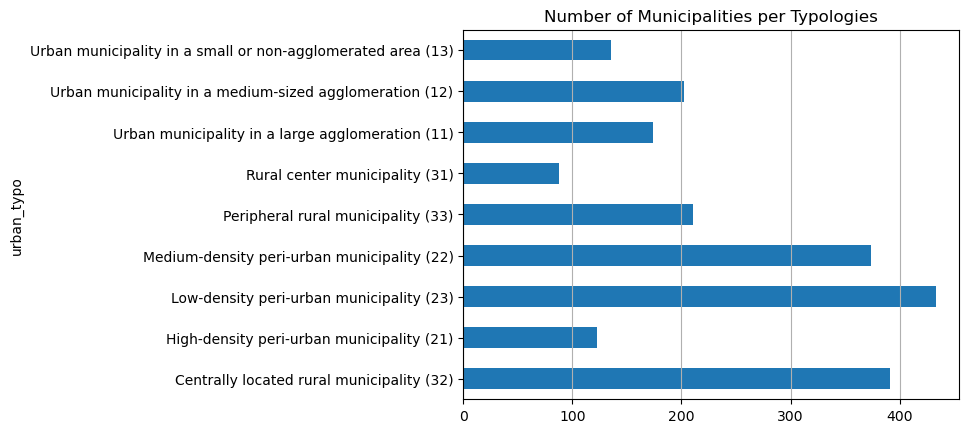

In [182]:

df3.plot(kind="barh")
plt.title("Number of Municipalities per Typologies")
plt.grid(axis="x")